## (i) Given two vectors  $a=[3,2,1]$ and  $b=[−1,0,1]$, calculate the outer product $ab^T$.
### Correction: The original question uses $a^Tb$, which is actually the inner product.

### Answer

$ u \otimes v = ub^T = \begin{bmatrix} (3)(-1) & (3)(0) & (3)(1)\\ (2)(-1) & (2)(0) & (2)(1)\\ (1)(-1) & (1)(0) & (1)(1)\end{bmatrix} = \begin{bmatrix} -3 & 0 & 3\\ -2 & 0 & 2\\ -1 & 0 & 1\end{bmatrix} $

### Code Demo

In [7]:
import numpy as np

a = [3, 2, 1]
b = [-1, 0, 1]
np.outer(a, b)

array([[-3,  0,  3],
       [-2,  0,  2],
       [-1,  0,  1]])

## (ii) Give an example of how the outer product can be useful in ML.

### Covariance Matrix
The covariance matrix summarizes the covariances between different features in a dataset,<br>
$ Cov(X, Y) = \frac{1}{N-1} \sum_{i=1}^{N} (X_i - \bar{X})(Y_i - \bar{Y}) = \frac{1}{N-1} \left( \sum_{i=1}^{N} X_i - \bar{X} \right) \left( \sum_{i=1}^{N} Y_i - \bar{Y} \right)^T. $

### Neural Network Weight Updates
$ W_{\text new} = W_{\text old} - \eta \cdot (x \otimes \nabla L) $ where $\nabla L$ is the gradient of the loss.

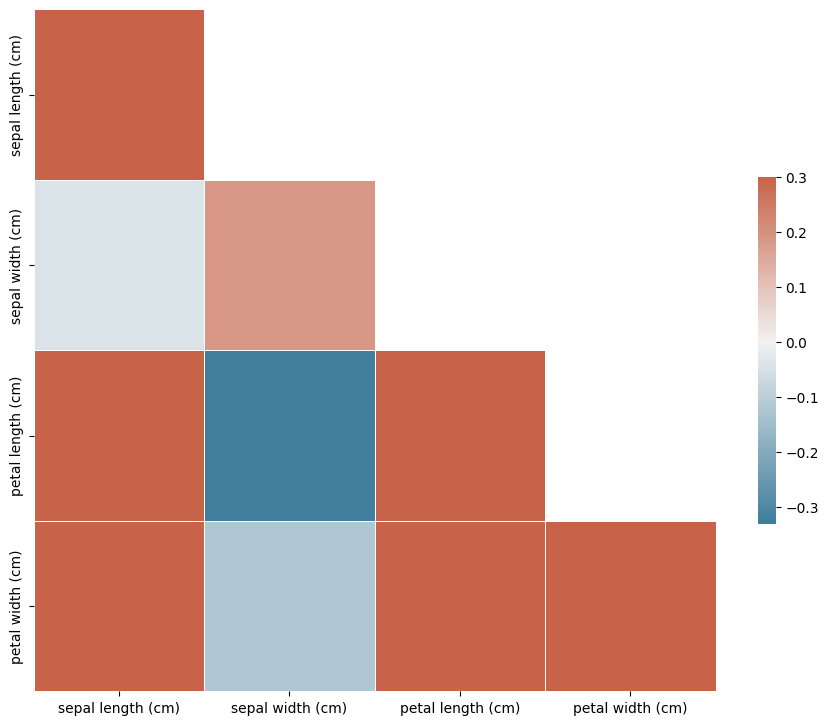

In [24]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Compute the covariance matrix via outer product
mean_values = np.mean(data, axis=0)
centered_data = data - mean_values
covariance_matrix = np.dot(centered_data.T, centered_data) / (len(data) - 1)

# Plot covariance matrix
mask = np.triu(np.ones_like(covariance_matrix, dtype=bool), k=1)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(covariance_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=feature_names, yticklabels=feature_names)
plt.title('Covariance Matrix')
plt.show()